## Exercice 1 : Régression Linéaire Simple
Dans cet exercice, nous allons appliquer une régression linéaire simple à un jeu de données synthétique ayant une relation linéaire claire.

**Étapes :**
1. Importez les bibliothèques nécessaires.
2. Créez un jeu de données synthétique avec une relation linéaire et un peu de bruit.
3. Visualisez les données avec un graphique en nuage de points.
4. Appliquez une régression linéaire simple.
5. Affichez les coefficients du modèle.
6. Faites des prédictions avec ce modèle.


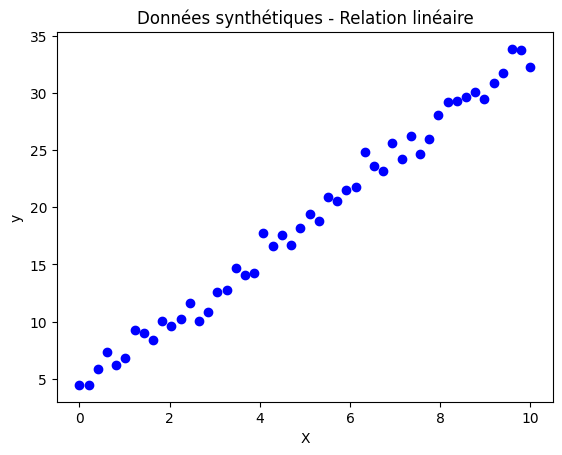

Pente (coefficient) : 2.942016600508178
Ordonnée à l'origine (intercept) : 4.064443092202968
Prédictions pour X = [11, 12, 13] : [36.4266257 39.3686423 42.3106589]


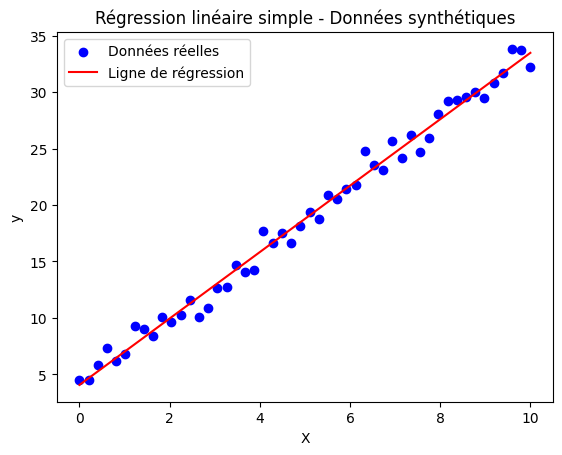

In [1]:
# Étape 1 : Importez les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Étape 2 : Créez un jeu de données synthétique avec une relation linéaire claire
# On génère des données X allant de 0 à 10
np.random.seed(42)  # Pour obtenir des résultats reproductibles
X = np.linspace(0, 10, 50).reshape(-1, 1)  # 50 points entre 0 et 10

# Générer y = 3X + 4 avec un peu de bruit
y = 3 * X + 4 + np.random.randn(50, 1)  # Ajout d'un bruit normal (randn)

# Convertir en DataFrame pour une manipulation plus facile
X = pd.DataFrame(X, columns=['X'])
y = pd.DataFrame(y, columns=['y'])

# Étape 3 : Visualisez les données avec un graphique en nuage de points
plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Données synthétiques - Relation linéaire")
plt.show()

# Étape 4 : Appliquez une régression linéaire simple
model = LinearRegression()
model.fit(X, y)

# Étape 5 : Affichez les coefficients du modèle
print("Pente (coefficient) :", model.coef_[0][0])
print("Ordonnée à l'origine (intercept) :", model.intercept_[0])

# Étape 6 : Faites une prédiction avec ce modèle
X_new = pd.DataFrame({'X': [11, 12, 13]})
y_pred = model.predict(X_new)

# Affichage des prédictions
print("Prédictions pour X = [11, 12, 13] :", y_pred.flatten())

# Visualisation de la ligne de régression avec les données
plt.scatter(X, y, color='blue', label="Données réelles")
plt.plot(X, model.predict(X), color='red', label="Ligne de régression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Régression linéaire simple - Données synthétiques")
plt.legend()
plt.show()


## Exercice 2 : Régression Linéaire avec des Données Réelles
Nous allons utiliser le dataset California Housing pour comprendre comment appliquer la régression linéaire à un jeu de données réel.

**Étapes :**
1. Importez et chargez le dataset.
2. Sélectionnez une variable indépendante pour prédire le prix des maisons.
3. Divisez les données en ensemble d'entraînement et de test.
4. Appliquez une régression linéaire simple.
5. Calculez et affichez l'erreur moyenne (MSE).
6. Visualisez la droite de régression sur les points de données réels.


MSE : 1.2923314440807299


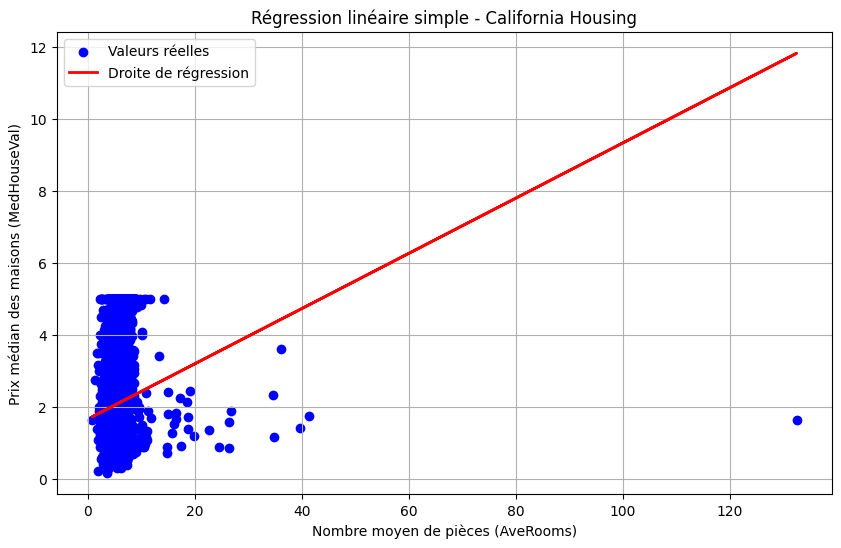

In [2]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Importez et chargez le dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MedHouseVal'])

# Étape 2 : Sélectionnez une variable indépendante (ici, "AveRooms" : nombre moyen de pièces par logement)
X_selected = X[['AveRooms']]

# Étape 3 : Divisez les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Étape 4 : Appliquez une régression linéaire simple
model = LinearRegression()
model.fit(X_train, y_train)

# Étape 5 : Prédisez les valeurs et calculez le MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

# Étape 6 : Visualisez la droite de régression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valeurs réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Droite de régression')
plt.xlabel("Nombre moyen de pièces (AveRooms)")
plt.ylabel("Prix médian des maisons (MedHouseVal)")
plt.title("Régression linéaire simple - California Housing")
plt.legend()
plt.grid()
plt.show()

## Exercice 4 : Régression Linéaire Multiple avec le Dataset California Housing

Nous allons maintenant appliquer une régression linéaire multiple sur un dataset réel. Nous allons utiliser plusieurs variables indépendantes du dataset **California Housing** pour prédire le prix médian des maisons.

**Étapes :**
1. Charger le dataset California Housing.
2. Sélectionner plusieurs variables indépendantes pertinentes.
3. Diviser les données en ensemble d'entraînement et de test.
4. Appliquer une régression linéaire multiple.
5. Calculer et interpréter le MSE, puis analyser les coefficients.
6. Visualiser les prédictions du modèle, ainsi que la droite de régression pour une variable.


MSE : 0.6574517278822649


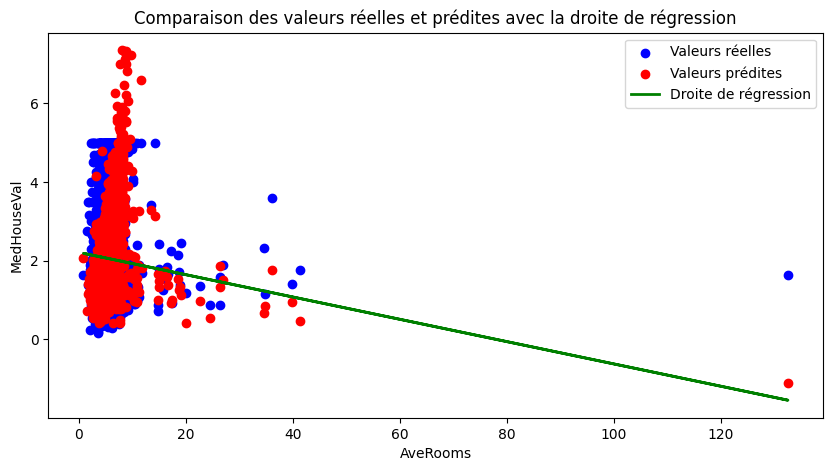

In [3]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Charger le dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MedHouseVal'])

# Étape 2 : Sélectionner plusieurs variables indépendantes
# Nous choisissons : "AveRooms", "AveOccup", "HouseAge", "MedInc"
X_selected = X[['AveRooms', 'AveOccup', 'HouseAge', 'MedInc']]

# Étape 3 : Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Étape 4 : Appliquer la régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Étape 5 : Calculer le MSE 
mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)


# Étape 6 : Visualisation des valeurs réelles vs prédictions
plt.figure(figsize=(10, 5))

# Visualiser la régression pour la variable 'AveRooms' en fixant les autres variables
X_plot = X_test[['AveRooms', 'AveOccup', 'HouseAge', 'MedInc']]
X_plot['AveOccup'] = X_plot['AveOccup'].mean()  # Fixer AveOccup à sa moyenne
X_plot['HouseAge'] = X_plot['HouseAge'].mean()  # Fixer HouseAge à sa moyenne
X_plot['MedInc'] = X_plot['MedInc'].mean()      # Fixer MedInc à sa moyenne

y_plot = model.predict(X_plot)

# Tracer la droite de régression
plt.scatter(X_test['AveRooms'], y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test['AveRooms'], y_pred, color='red', label='Valeurs prédites')
plt.plot(X_test['AveRooms'], y_plot, color='green', label='Droite de régression', linewidth=2)

plt.xlabel("AveRooms")
plt.ylabel("MedHouseVal")
plt.title("Comparaison des valeurs réelles et prédites avec la droite de régression")
plt.legend()
plt.show()


In [4]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
